# Billboard Detection

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#run this to clone
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 10560, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 10560 (delta 15), reused 0 (delta 0), pack-reused 10525
Receiving objects: 100% (10560/10560), 260.88 MiB | 30.44 MiB/s, done.
Resolving deltas: 100% (4707/4707), done.
Checking out files: 100% (8428/8428), done.


In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_cuda.txt | xargs -n 1 -L 1 pip install

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=f9791cfd2dc96c85e6f5f7a55069939eff737c4e57777fef19eab9280943a2f8
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-dsydb6h2/pycocotools_d231d4e866c8425b84428aacbb6f2080
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-dsydb6h2/pycocotools_d231d4e866c8425b84428aacbb6f2080
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263846 sha256=1e76daf063aa290d24392de77bb2a13cb768675914af6c9d379428634308a675
  Stored in directory: /tmp/pip-ephem-wheel-cache-enbaj5_u/wheels/b8/4c/a6/f34b4aa3f634b4461fc1934f6d1dedf20df540f6a028547647
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotoo

# Using already trained model for a demo

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
#Downloading pretrained model
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TBG8ItJ6608D68iFrUhcN7koehXD3QBg' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TBG8ItJ6608D68iFrUhcN7koehXD3QBg" -O billboard_trained.zip && rm -rf /tmp/cookies.txt

--2021-11-08 10:43:25--  https://docs.google.com/uc?export=download&id=1TBG8ItJ6608D68iFrUhcN7koehXD3QBg
Resolving docs.google.com (docs.google.com)... 209.85.147.138, 209.85.147.139, 209.85.147.113, ...
Connecting to docs.google.com (docs.google.com)|209.85.147.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.20K  --.-KB/s    in 0s      

2021-11-08 10:43:26 (35.8 MB/s) - written to stdout [3281]

--2021-11-08 10:43:26--  https://docs.google.com/uc?export=download&confirm=CQnW&id=1TBG8ItJ6608D68iFrUhcN7koehXD3QBg
Resolving docs.google.com (docs.google.com)... 209.85.147.101, 209.85.147.102, 209.85.147.113, ...
Connecting to docs.google.com (docs.google.com)|209.85.147.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-38-docs.googleusercontent.com/docs/securesc/3p4iss4fbu20vcfbv8i8gkqkjejqudk6/dsks79c2eo

In [ ]:
#unzipping the folder to accses it

! unzip -qq billboard_trained.zip

In [ ]:
#loading the trained model which is in pytorch format
gtf.Model(model_path="billboard_trained/final_model.pt");

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.parallel.data_parallel.DataParallel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attr

In [ ]:
#opening the text file and reading line by line
f = open("billboard_trained/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


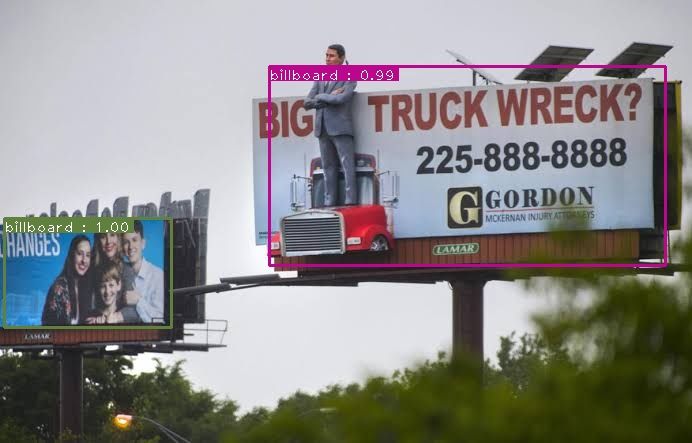

In [ ]:

img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img2.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
#Predicting the second image in our dataset

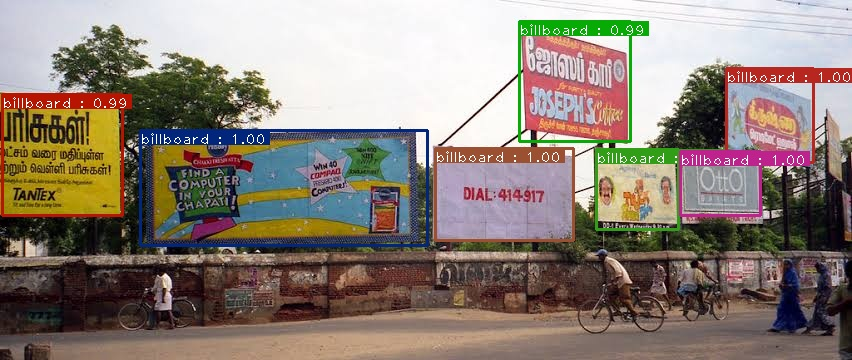

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img3.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

# Train you own detector

# Dataset

  - Credits - https://storage.googleapis.com/openimages/web/index.html
  
  - Collected using - https://github.com/EscVM/OIDv4_ToolKit
  
       - Command used to collect (inside OIDv4_ToolKit)
         - python main.py downloader --classes Apple Orange --type_csv validation
         
  - Converted the dataset to COCO format

In [ ]:
# Downloading dataset the dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nqsDz8USRCotC5m-a_0M3Kd74s0bre2v' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nqsDz8USRCotC5m-a_0M3Kd74s0bre2v" -O billboard.zip && rm -rf /tmp/cookies.txt

--2021-11-08 10:43:45--  https://docs.google.com/uc?export=download&id=1nqsDz8USRCotC5m-a_0M3Kd74s0bre2v
Resolving docs.google.com (docs.google.com)... 209.85.147.100, 209.85.147.102, 209.85.147.138, ...
Connecting to docs.google.com (docs.google.com)|209.85.147.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.20K  --.-KB/s    in 0s      

2021-11-08 10:43:45 (39.1 MB/s) - written to stdout [3273]

--2021-11-08 10:43:45--  https://docs.google.com/uc?export=download&confirm=0nSA&id=1nqsDz8USRCotC5m-a_0M3Kd74s0bre2v
Resolving docs.google.com (docs.google.com)... 209.85.147.100, 209.85.147.102, 209.85.147.138, ...
Connecting to docs.google.com (docs.google.com)|209.85.147.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-a0-docs.googleusercontent.com/docs/securesc/5ibtse8mj0kscdkv8lqt3gr1fu0lrpe7/undb3i3jrq

In [ ]:
! unzip -q billboard.zip

# COCO Format - 2

## Dataset Directory Structure

         ./ (root_dir)
          |
          |------billboard (coco_dir) 
          |         |
          |         |---Images (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Images.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "./";
 - coco_dir = "billboard";
 - img_dir = "./";
 - set_dir = "Images";

 
 Note: Annotation file name too coincides against the set_dir

# Training

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [ ]:
#calling our class
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
#this shows the directory of the images to use for training

root_dir = "./";
coco_dir = "billboard";
img_dir = "./";
set_dir = "Images";

In [ ]:
#training by calling the function Train_Dataset
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=2, use_gpu=True)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Num training images: 3399


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#using resnet for our model and downloading it
gtf.Model(model_name="resnet50");

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to ./resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
#hyperperameter tuning(learning rate,validation)
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, print_interval=20)

In [ ]:
#training our model with epochs using the saved model in pytorch
gtf.Train(num_epochs=17, output_model_name="final_model.pt");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 0 | Iteration: 0 | Classification loss: 1.13028 | Regression loss: 1.02886 | Running loss: 2.15914
Epoch: 0 | Iteration: 20 | Classification loss: 0.93656 | Regression loss: 0.45416 | Running loss: 2.02630
Epoch: 0 | Iteration: 40 | Classification loss: 0.69975 | Regression loss: 1.06063 | Running loss: 1.90563
Epoch: 0 | Iteration: 60 | Classification loss: 0.61359 | Regression loss: 1.00246 | Running loss: 1.81662
Epoch: 0 | Iteration: 80 | Classification loss: 0.48103 | Regression loss: 1.05555 | Running loss: 1.75373
Epoch: 0 | Iteration: 100 | Classification loss: 0.39283 | Regression loss: 0.78132 | Running loss: 1.70719
Epoch: 0 | Iteration: 120 | Classification loss: 0.48159 | Regression loss: 0.93180 | Running loss: 1.67158
Epoch: 0 | Iteration: 140 | Classification loss: 0.93166 | Regression loss: 0.89330 | Running loss: 1.66338
Epoch: 0 | Iteration: 160 | Classification loss: 0.65126 | Regression loss: 0.98241 | Running loss: 1.64187
Epoch: 0 | Iteration: 180 | Classi

KeyboardInterrupt: ignored

# We are Testing now through our images

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
gtf.Model(model_path="final_model.pt");

In [ ]:
f = open("billboard/annotations/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img1.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img2.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img3.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img4.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img5.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img6.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img7.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img8.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img9.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img10.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img11.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img12.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img13.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img14.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img15.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img16.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img17.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img18.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img19.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.5);
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img20.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 